## 作業

1. 如何使用已經訓練好的模型？
* Ans：使用YOLO截入模型
 * yolo_model = YOLO(model_path, classes_path)

2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？

* Ans：將VOC label的xml格式檔轉為為YOLO使用的txt檔。
 * Row format: image_file_path box1 box2 ... boxN;
 * Box format: x_min,y_min,x_max,y_max,class_id (no space).
 * 例：path/to/img1.jpg 50,100,150,200,0 30,50,200,120,3
 * path/to/img2.jpg 120,300,250,600,2

In [1]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.0


In [2]:
pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive/Colab Notebooks'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks/keras-yolo3


In [0]:
from PIL import Image
image = Image.open('dog.jpg') 

Using TensorFlow backend.











logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(416, 416, 3)
Found 1 boxes for img
car 0.50 (448, 100) (715, 162)
8.86411641899997


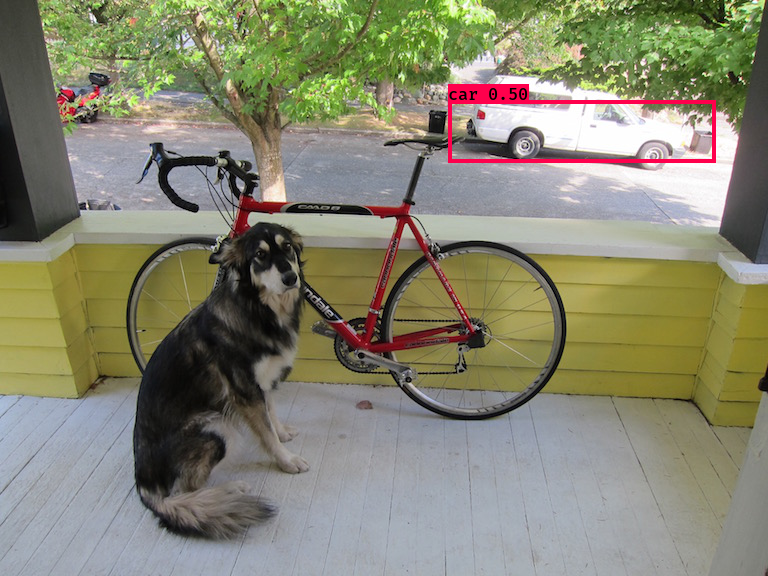

In [5]:
# 1.模型載入已轉換好的權重，丟入要預測的圖片即可
log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
classes_path = 'model_data/voc_classes.txt'
from yolo import YOLO
yolo_model = YOLO(model_path=log_dir + 'trained_weights_final.h5', classes_path=classes_path)
r_image = yolo_model.detect_image(image)
r_image

In [6]:
# 2.由檔案內容可知，格式為圖片路徑、所有圖片中類別方框的四點座標及類別編號
with open("2007_train.txt", "r") as f:
  d = f.readlines()
d

['./VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6\n',
 './VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12\n',
 './VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14\n',
 './VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6\n',
 './VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14\n',
 './VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0\n',
 './VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18\n',
 './VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14\n',
 './VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11\n',
 './VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18\n',
 './VOCdevkit/VOC2007/JPEGImages/000044.jpg 1,1,370,330,8 99,101,312,213,7\n',
 './VOCdevkit/VOC2007/JPEGImages/000047.jpg 15